<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Day_13_14_Python_Learing_Iris%2C_visualization_2_3D%2C_Seaborn_%26_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# percobaan klasifikasi bunga iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
iris = load_iris()
X = iris.data  # Fitur (panjang/sepal, lebar/petal, dll.)
y = iris.target  # Label (0: Setosa, 1: Versicolor, 2: Virginica)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 1.0


In [ ]:
pip install matplotlib scikit-learn

In [ ]:
# Install dependencies terlebih dahulu
# pip install matplotlib scikit-learn pillow
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib.animation import FuncAnimation

%matplotlib inline
from IPython.display import HTML
HTML(ani.to_jshtml())

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Reduksi dimensi ke 2D dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['red', 'green', 'blue']
labels = iris.target_names

# Fungsi animasi yang DISEDERHANAKAN
def animate(frame):
    ax.clear()
    scale = frame / 20  # Skala 0 → 1 selama 20 frame

    for i in range(3):
        mask = y == i
        scaled_x = X_pca[mask, 0] * scale
        scaled_y = X_pca[mask, 1] * scale

        ax.scatter(scaled_x,
                   scaled_y,
                   c=colors[i],
                   label=labels[i],
                   alpha=0.3 + 0.7*scale,
                   s=50 + 150*scale)

    ax.set_title(f'Visualisasi Klaster Iris ({int(scale*100)}%)', fontsize=14)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

# Buat animasi
ani = FuncAnimation(fig,
                   animate,
                   frames=np.arange(0, 21),  # 21 frame (0-20)
                   interval=100,             # 100ms per frame
                   repeat=False)

# Simpan dengan Pillow (tidak perlu ImageMagick)
try:
    ani.save('iris_animation.gif',
             writer='pillow',
             fps=10,
             dpi=100)
    print("✅ GIF berhasil disimpan sebagai 'iris_animation.gif'")
except Exception as e:
    print("❌ Gagal menyimpan GIF:", str(e))

# Tampilkan animasi di notebook (jika menggunakan Jupyter)
plt.show()

UnboundLocalError: cannot access local variable 'y' where it is not associated with a value

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

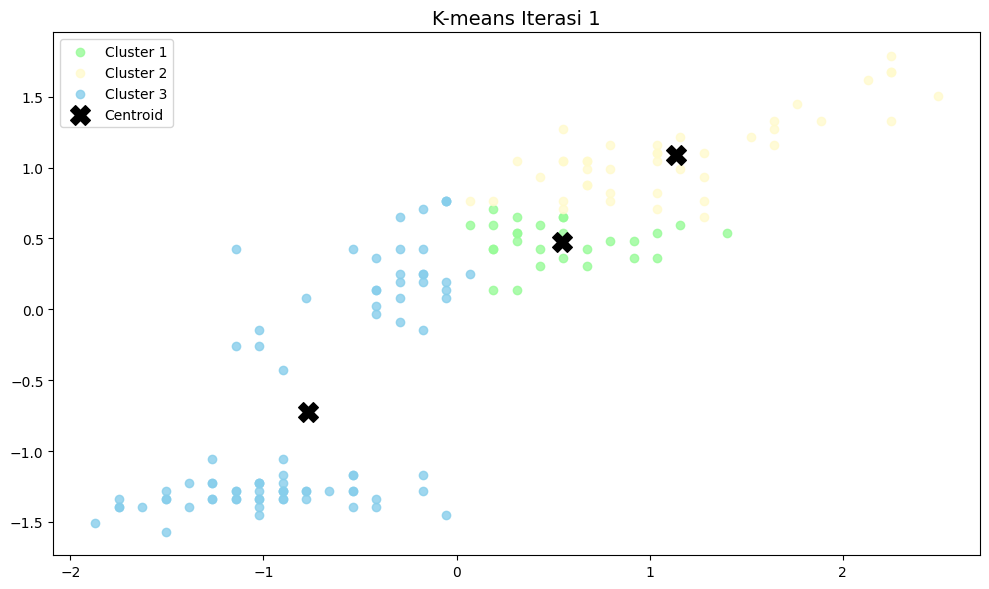

In [2]:
#proses iterasi K-mean, regresi model iris ( iris cluster animation )

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import imageio

# Muat dataset Iris
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length dan Petal length
X = StandardScaler().fit_transform(X)  # Normalisasi fitur

# Inisialisasi K-means
k = 3
max_iter = 100
np.random.seed(42)  # Untuk reprodulibilitas
centroids = np.random.randn(k, X.shape[1])  # Centroid awal
assignments = np.zeros(X.shape[0], dtype=int)  # Inisialisasi assignmen
frames = []  # Simpan frame animasi

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(X, centroid):
    return np.sqrt(np.sum((X - centroid) ** 2, axis=1))

# Fungsi untuk update centroid
def update_centroids(X, assignments, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[assignments == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[i] = np.random.randn(X.shape[1])
    return new_centroids

# Fungsi untuk membuat frame animasi
def plot_clusters(X, centroids, assignments, iteration):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#98FB98', '#FFFACD', '#87CEEB']  # Warna cluster

    for i in range(k):
        cluster_points = X[assignments == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   color=colors[i], label=f'Cluster {i+1}', alpha=0.8)

    ax.scatter(centroids[:, 0], centroids[:, 1],
               color='black', marker='X', s=200, label='Centroid')
    ax.set_title(f'K-means Iterasi {iteration}', fontsize=14)
    ax.legend()
    plt.tight_layout()

    # Simpan frame
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    frames.append(image)
    plt.close()

# Eksekusi algoritma K-means
for iteration in range(max_iter):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    new_assignments = np.argmin(distances, axis=0)

    new_centroids = update_centroids(X, new_assignments, k)

    plot_clusters(X, new_centroids, new_assignments, iteration + 1)

    if np.all(new_centroids == centroids):
        print(f"Konvergen pada iterasi {iteration + 1}")
        break
    centroids = new_centroids

# Simpan animasi sebagai GIF
imageio.mimsave('iris_cluster_animation.gif', frames, fps=5)

print("Animasi K-means berhasil disimpan sebagai iris_cluster_animation.gif")

AttributeError: 'FigureCanvasAgg' object has no attribute 'tostring_rgb'

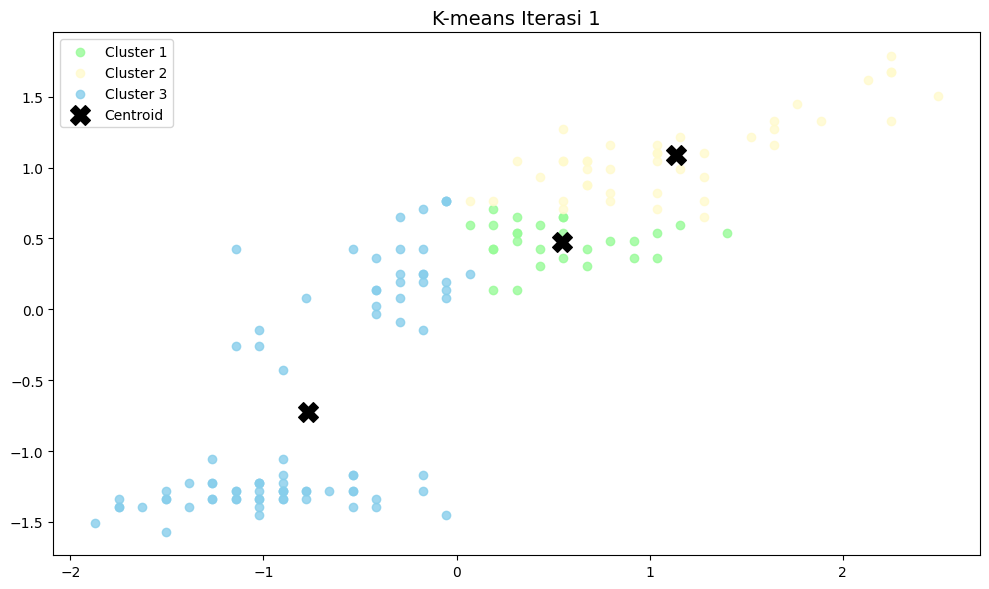

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import imageio
from PIL import Image  # Tambahkan dependensi Pillow

# Muat dataset Iris
iris = load_iris()
X = iris.data[:, [0, 2]]  # Sepal length dan Petal length
X = StandardScaler().fit_transform(X)  # Normalisasi data

# Inisialisasi Parameter
k = 3
max_iter = 100
np.random.seed(42)  # Untuk reproduktibilitas
centroids = np.random.randn(k, X.shape[1])  # Centroid awal
assignments = np.zeros(X.shape[0], dtype=int)
frames = []  # Simpan frame animasi

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(X, centroid):
    return np.sqrt(np.sum((X - centroid) ** 2, axis=1))

# Fungsi untuk update centroid
def update_centroids(X, assignments, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[assignments == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
        else:
            new_centroids[i] = np.random.randn(X.shape[1])
    return new_centroids

# Fungsi untuk membuat frame animasi
def plot_clusters(X, centroids, assignments, iteration):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['#98FB98', '#FFFACD', '#87CEEB']  # Warna cluster

    for i in range(k):
        cluster_points = X[assignments == i]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1],
                   color=colors[i], label=f'Cluster {i+1}', alpha=0.8)

    ax.scatter(centroids[:, 0], centroids[:, 1],
               color='black', marker='X', s=200, label='Centroid')
    ax.set_title(f'K-means Iterasi {iteration}', fontsize=14)
    ax.legend()
    plt.tight_layout()

    # Simpan frame sebagai gambar
    fig.canvas.draw()
    img = Image.frombytes('RGB', fig.canvas.get_width_height(), fig.canvas.tostring_rgb())
    frames.append(np.array(img))
    plt.close()

# Eksekusi K-means
for iteration in range(max_iter):
    distances = np.array([euclidean_distance(X, centroid) for centroid in centroids])
    new_assignments = np.argmin(distances, axis=0)

    new_centroids = update_centroids(X, new_assignments, k)

    plot_clusters(X, new_centroids, new_assignments, iteration + 1)

    if np.all(new_centroids == centroids):
        print(f"Konvergen pada iterasi {iteration + 1}")
        break
    centroids = new_centroids

# Simpan animasi sebagai GIF
imageio.mimsave('iris_cluster_animation.gif', frames, fps=5)

print("Animasi K-means berhasil disimpan sebagai iris_cluster_animation.gif")

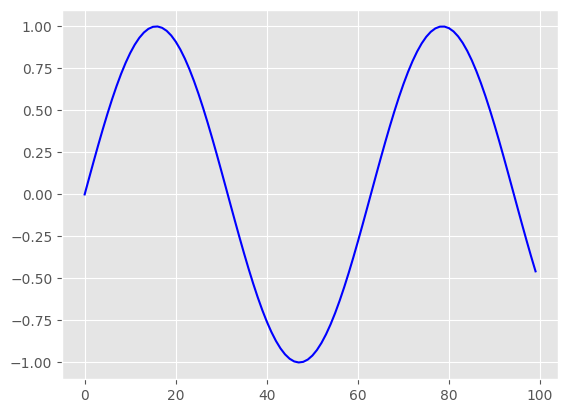

In [6]:
# Animasi garis yang menunjukkan gelombang sinus yang bergerak secara dinamis.
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

style.use('ggplot')

fig, ax = plt.subplots()
x_vals = []
y_vals = []

def animate(i):
    x_vals.append(i)
    y_vals.append(np.sin(i/10))

    ax.clear()
    ax.plot(x_vals, y_vals, 'b-')

ani = animation.FuncAnimation(fig, animate, frames=100, interval=100)
ani.save('weather_animation.gif', writer='imagemagick')
plt.show()

RuntimeError: x must be a sequence

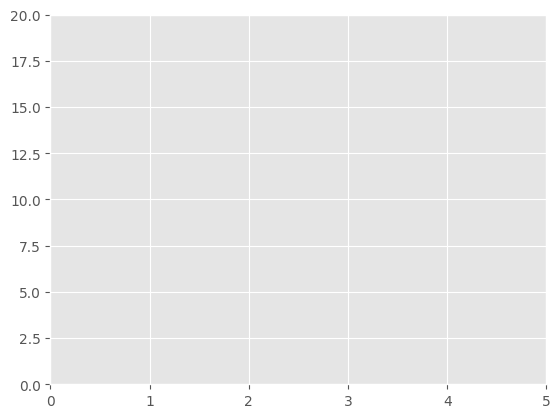

In [7]:
#visualisasi animasi titik sederhana , visualisasi pergerakan data, animasi dasar python
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Data titik yang akan di animasi
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(0, 20)
point, = ax.plot([], [], 'ro')

def update(num):
    point.set_data(x[num], y[num])
    return point,

ani = FuncAnimation(fig, update, frames=6, interval=200, blit=True)
plt.show()

RuntimeError: x must be a sequence

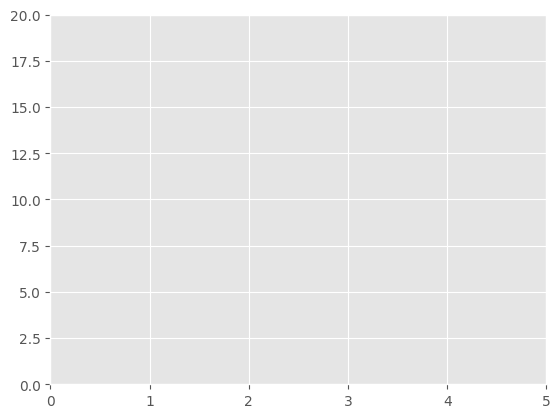

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Data titik yang akan di animasi
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(0, 20)
point, = ax.plot([], [], 'ro')  # 'ro' artinya titik merah

def update(num):
    point.set_data(x[num], y[num])
    return point,

# Buat animasi (frames=6 karena ada 6 titik)
ani = FuncAnimation(fig, update, frames=len(x), interval=300, blit=True)

# Simpan sebagai GIF
ani.save('animasi_titik_sederhana.gif', writer='imagemagick', fps=2)
print("Animasi berhasil disimpan!")

plt.show()

RuntimeError: x must be a sequence

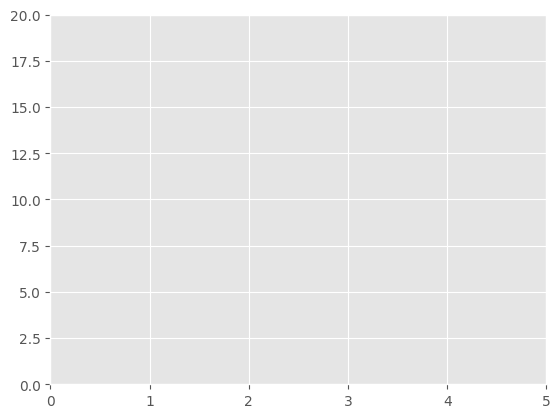

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Data titik yang akan di animasi (pastikan data dalam bentuk list)
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(0, 20)

# Inisialisasi titik
point, = ax.plot([], [], 'ro')

def update(num):
    # Pastikan data x dan y sesuai
    point.set_data(x[num], y[num])
    return point,

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(x), interval=300, blit=True)

# Simpan sebagai GIF
ani.save('animasi_titik.gif', writer='imagemagick', fps=2)

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

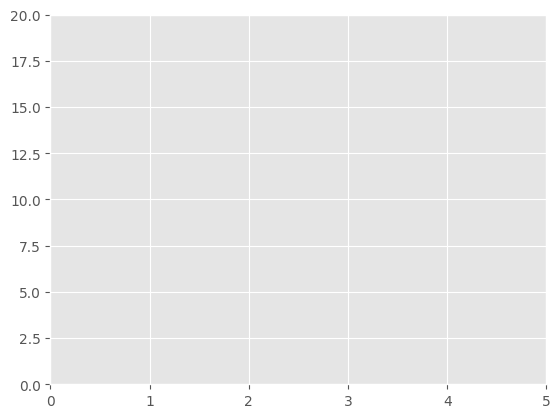

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from google.colab import files  # Tambahkan ini

# Data titik
x = [0, 1, 2, 3, 4, 5]
y = [0, 1, 4, 9, 16, 25]

fig, ax = plt.subplots()
ax.set_xlim(0, 5)
ax.set_ylim(0, 20)
point, = ax.plot([], [], 'ro')

def update(num):
    point.set_data([x[num]], [y[num]])
    return point,

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(x), interval=1000, blit=True)

# Simpan animasi ke file
ani.save('animasi_titik.gif', writer='pillow')  # Gunakan 'pillow' untuk Colab

# Unduh file secara otomatis
files.download('animasi_titik.gif')  # Tambahkan baris ini

plt.show()

Animasi 3D berhasil disimpan!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

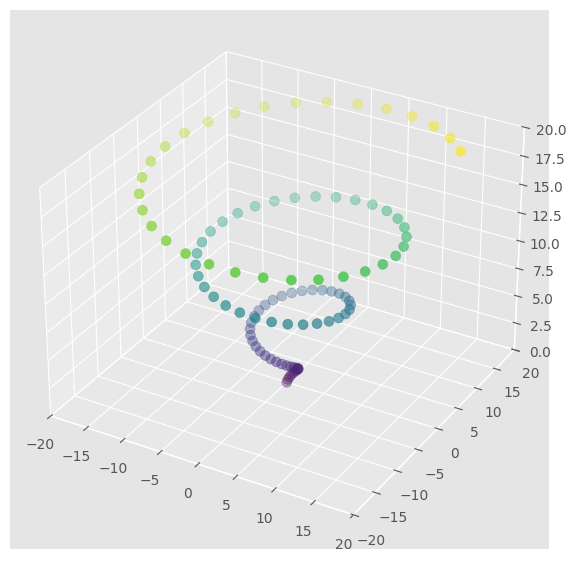

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generasi data 3D untuk animasi
t = np.linspace(0, 20, 100)
x = np.sin(t) * t
y = np.cos(t) * t
z = t

# Inisialisasi plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(0, 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Inisialisasi titik untuk animasi
points = ax.scatter([], [], [], c=[], cmap='viridis', s=50)

def update(frame):
    # Update posisi titik
    x_data = x[:frame]
    y_data = y[:frame]
    z_data = z[:frame]
    colors = z_data  # Warna berdasarkan nilai Z

    ax.clear()  # Bersihkan plot
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 20)
    points = ax.scatter(x_data, y_data, z_data, c=colors, cmap='viridis', s=50)
    return points

# Buat animasi (60 frame)
ani = FuncAnimation(
    fig,
    update,
    frames=100,
    interval=50,
    blit=False
)

# Simpan sebagai GIF
ani.save('animasi_3d.gif', writer='imagemagick', fps=30)
print("Animasi 3D berhasil disimpan!")

# Unduh file secara otomatis
files.download('animasi_3d.gif')

plt.show()

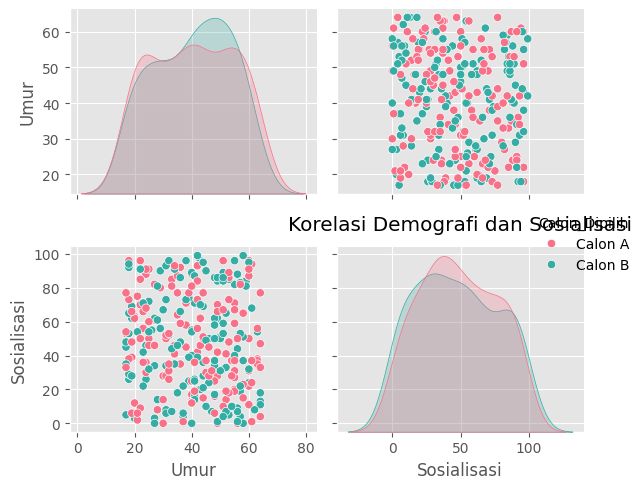

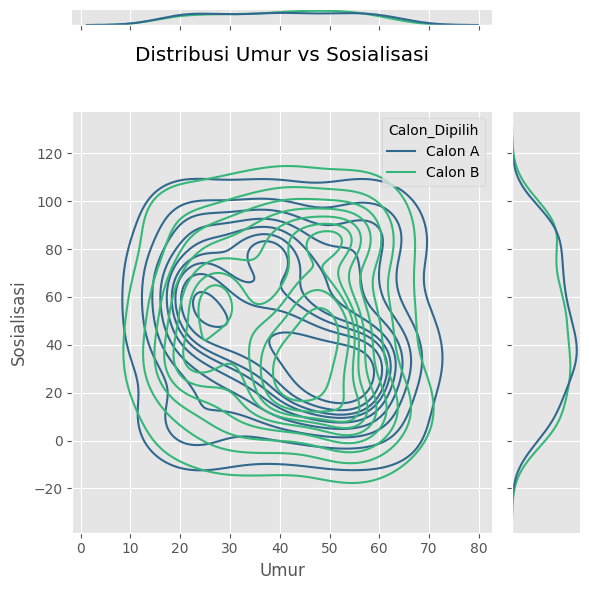

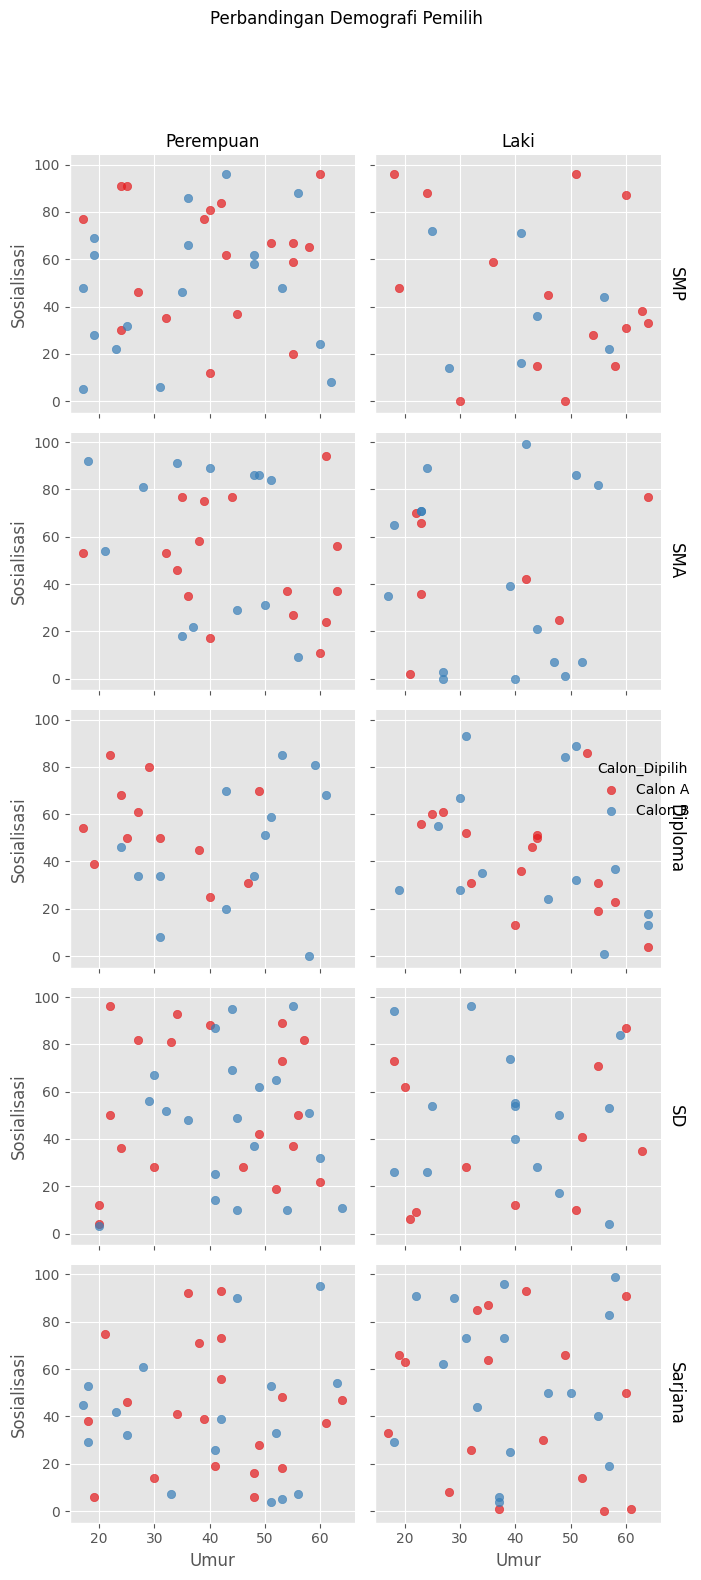

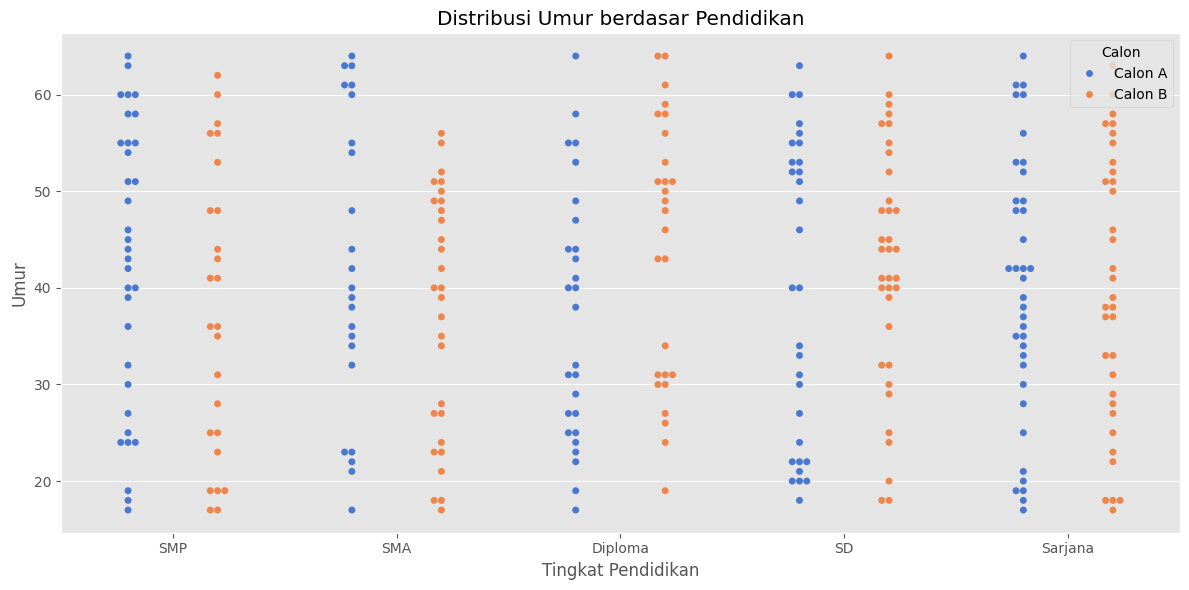

ValueError: could not convert string to float: 'Perempuan'

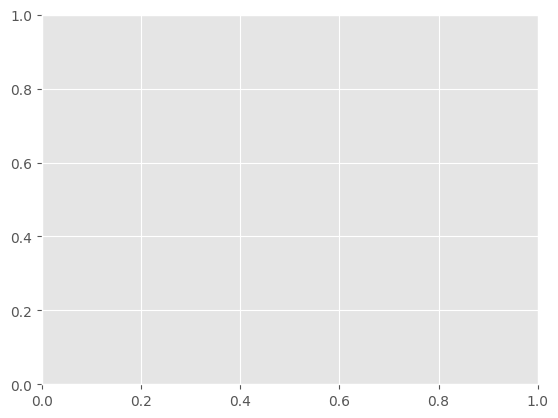

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Menghasilkan data acak
np.random.seed(42)
data = pd.DataFrame({
    'Umur': np.random.randint(17, 65, 300),
    'Jenis_Kelamin': np.random.choice(['Laki', 'Perempuan'], 300),
    'Pendidikan': np.random.choice(['SD', 'SMP', 'SMA', 'Diploma', 'Sarjana'], 300),
    'Calon_Dipilih': np.random.choice(['Calon A', 'Calon B'], 300),
    'Sosialisasi': np.random.randint(0, 100, 300)  # Persen partisipasi sosialisasi
})

# Visualisasi Pasangan Koordinat dengan PairPlot
sns.pairplot(data, hue='Calon_Dipilih', palette='husl',
           vars=['Umur', 'Sosialisasi'])
plt.title('Korelasi Demografi dan Sosialisasi', y=1.05)
plt.tight_layout()
plt.show()

# Visualisasi Distribusi dengan JointPlot
sns.jointplot(x='Umur', y='Sosialisasi', data=data, hue='Calon_Dipilih',
            palette='viridis', kind='kde')
plt.title('Distribusi Umur vs Sosialisasi', y=1.1)
plt.tight_layout()
plt.show()

# Visualisasi Multifaset dengan FacetGrid
g = sns.FacetGrid(data, col='Jenis_Kelamin', row='Pendidikan',
                hue='Calon_Dipilih', palette='Set1', margin_titles=True)
g.map(plt.scatter, 'Umur', 'Sosialisasi', alpha=0.7)
g.add_legend()
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.suptitle('Perbandingan Demografi Pemilih', y=1.05)
plt.tight_layout()
plt.show()

# Visualisasi Data Kategorikal dengan SwarmPlot
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Pendidikan', y='Umur', hue='Calon_Dipilih',
             data=data, palette='muted', dodge=True)
plt.title('Distribusi Umur berdasar Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Umur')
plt.legend(title='Calon')
plt.tight_layout()
plt.show()

# Visualisasi Korelasi dengan Heatmap (animasi)
fig, ax = plt.subplots()
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

# Animasi Distribusi Dinamis (opsional)
def animate(frame):
    ax.clear()
    sns.histplot(data=data.sample(50), x='Umur', y='Sosialisasi',
                 hue='Calon_Dipilih', kde=True, ax=ax, palette='bright')
    ax.set_title(f'Distribusi Dinamis (Frame {frame})')

ani = FuncAnimation(fig, animate, frames=50, interval=500)
ani.save('animasi_pilkada.gif', writer='imagemagick', fps=2)
print("Animasi tersimpan sebagai 'animasi_pilkada.gif'")